In [91]:
import numpy as np
import pandas as pd

In [177]:
df_calories = pd.read_csv("/content/calories.csv")
df_exercise = pd.read_csv("/content/exercise.csv")

In [197]:
df = pd.merge(df_exercise, df_calories, on="User_ID")

In [198]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [199]:
df=df.drop('User_ID',axis=1)

In [200]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [201]:
df['Gender'] = df['Gender'].map({'male':0, 'female':1})

In [202]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

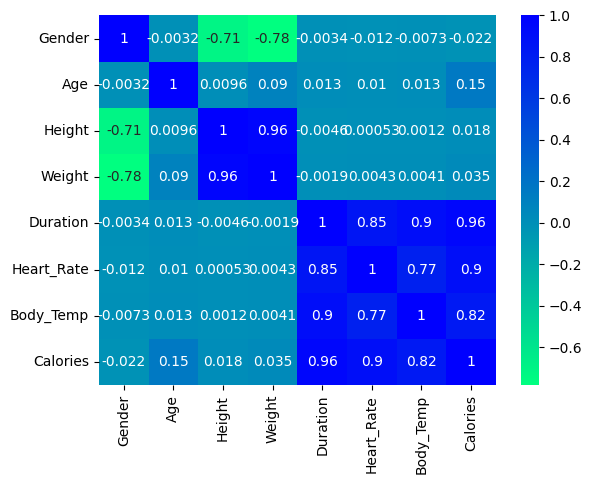

In [205]:
data_corr = df.corr()
sns.heatmap(data_corr, annot=True, cmap='winter_r')
plt.show()

In [206]:
df.corrwith(df['Calories']).abs().sort_values(ascending=False)

,0
Calories,1.000000
Duration,0.955421
Heart_Rate,0.897882
Body_Temp,0.824558
Age,0.154395
Weight,0.035481
Gender,0.022357
Height,0.017537


In [207]:
df['duration_x_hr'] = df['Duration'] * df['Heart_Rate']
df['duration_x_temp'] = df['Duration'] * df['Body_Temp']
df['hr_x_temp'] = df['Heart_Rate'] * df['Body_Temp']
df['hr_per_min'] = df['Heart_Rate'] / df['Duration']
df['temp_per_min'] = df['Body_Temp'] / df['Duration']

In [208]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,duration_x_hr,duration_x_temp,hr_x_temp,hr_per_min,temp_per_min
0,0,68,190.0,94.0,29.0,105.0,40.8,231.0,3045.0,1183.2,4284.0,3.620690,1.406897
1,1,20,166.0,60.0,14.0,94.0,40.3,66.0,1316.0,564.2,3788.2,6.714286,2.878571
2,0,69,179.0,79.0,5.0,88.0,38.7,26.0,440.0,193.5,3405.6,17.600000,7.740000
3,1,34,179.0,71.0,13.0,100.0,40.5,71.0,1300.0,526.5,4050.0,7.692308,3.115385
4,1,27,154.0,58.0,10.0,81.0,39.8,35.0,810.0,398.0,3223.8,8.100000,3.980000


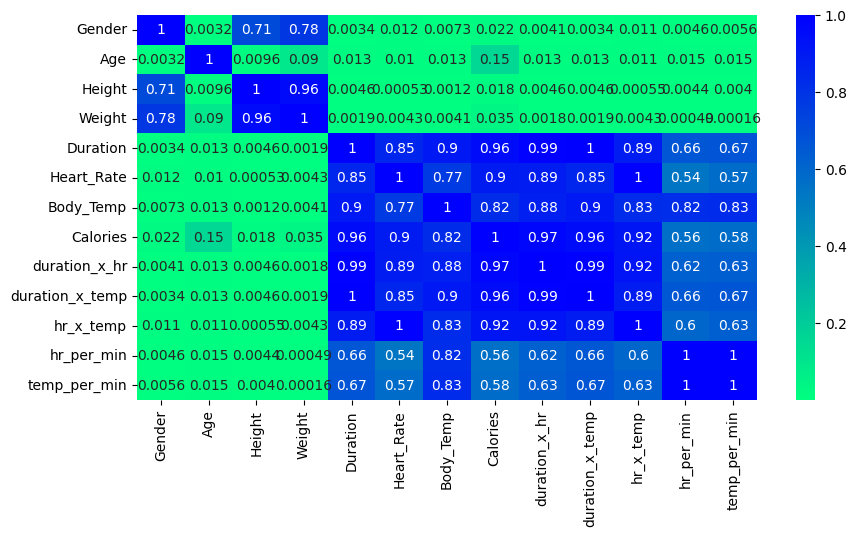

In [209]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr().abs(), annot=True, cmap='winter_r')
plt.show()

In [210]:
df.corrwith(df['Calories']).abs().sort_values(ascending=False)

,0
Calories,1.000000
duration_x_hr,0.974597
duration_x_temp,0.956251
Duration,0.955421
hr_x_temp,0.917384
Heart_Rate,0.897882
Body_Temp,0.824558
temp_per_min,0.576303
hr_per_min,0.564316
Age,0.154395


In [211]:
df['BMI'] = df['Weight'] / (df['Height']/100)**2
df['HR_per_Weight'] = df['Heart_Rate'] / df['Weight']

In [212]:
df.drop('Height',axis=1,inplace=True)

In [213]:
df.drop('Weight',axis=1,inplace=True)

In [214]:
X = df.drop(['Calories'], axis=1)
y = df['Calories']

In [215]:
df.corrwith(df['Calories']).abs().sort_values(ascending=False)

,0
Calories,1.000000
duration_x_hr,0.974597
duration_x_temp,0.956251
Duration,0.955421
hr_x_temp,0.917384
Heart_Rate,0.897882
Body_Temp,0.824558
temp_per_min,0.576303
hr_per_min,0.564316
HR_per_Weight,0.364926


In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_prepared = scaler.fit_transform(X)

In [217]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [218]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42)

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [220]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 6.241899689787569
MSE: 71.15100109812369
RMSE: 8.435105280796659


In [221]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [222]:
rf_model_pred = rf_model.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test, rf_model_pred))
print('MSE', metrics.mean_squared_error(y_test, rf_model_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, rf_model_pred)))

MAE 1.8076200000000002
MSE 7.918945666666667
RMSE 2.8140621291411936


In [223]:
from xgboost import XGBRegressor
from sklearn import metrics
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=1000,
    random_state=42,
    verbose=200
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test, y_pred))
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:33:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


MAE 1.1238035783469678
MSE 3.0819782489932117
RMSE 1.7555563929971636


In [224]:
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(X_train, y_train)
svm_model_pred = svm_model.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test, svm_model_pred))
print('MSE', metrics.mean_squared_error(y_test, svm_model_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, svm_model_pred)))

MAE 2.030465844588784
MSE 22.157662944390914
RMSE 4.707192681884917


In [225]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test, knn_model_pred))
print('MSE', metrics.mean_squared_error(y_test, knn_model_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, knn_model_pred)))

MAE 2.851466666666667
MSE 16.21248
RMSE 4.026472401494886


In [226]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr_model.fit(X_train, y_train)
gbr_model_pred = gbr_model.predict(X_test)
print('MAE', metrics.mean_absolute_error(y_test, gbr_model_pred))
print('MSE', metrics.mean_squared_error(y_test, gbr_model_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, gbr_model_pred)))

MAE 2.434893957395572
MSE 11.397987717370384
RMSE 3.3760905967361694


In [227]:
import joblib

In [228]:
joblib.dump(xgb_model, 'model.pkl')

['model.pkl']

In [229]:
X.columns

Index(['Gender', 'Age', 'Duration', 'Heart_Rate', 'Body_Temp', 'duration_x_hr',
       'duration_x_temp', 'hr_x_temp', 'hr_per_min', 'temp_per_min', 'BMI',
       'HR_per_Weight'],
      dtype='object')

In [238]:
xgb_model.save_model("model.json")